In [22]:
import numpy as np
from matplotlib import pyplot as plt

### Parameters

In [23]:
# Number of steps
N = 4

# mu
mu = 0.01

# v vector
v1 = 0
v2 = 0

### Respective functions

In [24]:
def f(x, y):
    return 1

# y = 1
def g_n(x):
    return 0

# y = 0
def g_s(x):
    return 0

# x = 0
def g_w(y):
    return 0

# x = 1
def g_e(y):
    return 0
    

### Build Diagonal Matrix

In [25]:
def A_matrix(h, mu, Ni, Ni2, a_p, a_s, a_w, a_e, a_n):
    
    A_0  = a_p  * np.eye(Ni2, k=0)
    A_R1 = a_e * np.eye(Ni2, k=1)
    A_RN = a_n * np.eye(Ni2, k=Ni)
    A_L1 = a_w * np.eye(Ni2, k=-1)
    A_LN = a_s * np.eye(Ni2, k=-Ni)
    
    return A_0 + A_R1 + A_RN + A_L1 + A_LN

### Solver Function

In [26]:
def pde_solve(N, mu, v1, v2):
    
    # Step size
    h = 1/N
    
    # Make grid
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1) 

    # Inner points
    xi = x[1:-1]       
    yi = y[1:-1] 
    Xi, Yi = np.meshgrid(xi, yi)
    Ni = N-1       # Number of inner points in each direction
    Ni2 = Ni**2    # Number of inner points in total
    
    # Exact Solution (MUST BE CHANGED IF U IS CHANGED)
    #U_exact = Xi**2 + 2*Yi**2
    
    # Coefficients
    a_p = (4 * mu) / h**2
    a_e = - mu/h**2 + v1/(2*h)
    a_n = - mu/h**2 + v2/(2*h)
    a_w = - mu/h**2 - v1/(2*h)
    a_s = - mu/h**2 - v2/(2*h)
    
    # Create A matrix
    A = A_matrix(h, mu, Ni, Ni2, a_p, a_s, a_w, a_e, a_n)
    
    # Handle interior stack-edges
    for i in range(1, Ni):
        edge = i*Ni
        A[edge-1, edge] = 0
        A[edge, edge-1] = 0
            
    # Fill inn b vector
    b = np.zeros(Ni2)
    for j in range(Ni):
        for i in range(Ni):
            b[j*Ni + i] = f(x[i+1], y[j+1])
        
    # Include the boundary conditions
    b[0:Ni] = b[0:Ni] - a_s*g_s(xi)                        # y=0
    b[Ni2-Ni:Ni2] = b[Ni2-Ni:Ni2] - a_n*g_n(xi)            # y=1
    b[0:Ni2:Ni] = b[0:Ni2:Ni] - a_w*g_w(yi)                # x=0
    b[Ni-1:Ni2:Ni] = b[Ni-1:Ni2:Ni] - a_e*g_e(yi)          # x=1
    
    # Solve system numerically
    U = np.linalg.solve(A, b)
    U = np.reshape(U, (Ni, Ni))
    

    return U, Xi, Yi

### Solutions

In [29]:
U, Xi, Yi = pde_solve(10, mu, v1, v2)
print(U)

[[1.28130983 2.06261966 2.53971336 2.79994256 2.88282917 2.79994256
  2.53971336 2.06261966 1.28130983]
 [2.06261966 3.42945545 4.29629123 4.77722772 4.93143154 4.77722772
  4.29629123 3.42945545 2.06261966]
 [2.53971336 4.29629123 5.43876839 6.08124556 6.28844155 6.08124556
  5.43876839 4.29629123 2.53971336]
 [2.79994256 4.77722772 6.08124556 6.82054455 7.05984355 6.82054455
  6.08124556 4.77722772 2.79994256]
 [2.88282917 4.93143154 6.28844155 7.05984355 7.30984355 7.05984355
  6.28844155 4.93143154 2.88282917]
 [2.79994256 4.77722772 6.08124556 6.82054455 7.05984355 6.82054455
  6.08124556 4.77722772 2.79994256]
 [2.53971336 4.29629123 5.43876839 6.08124556 6.28844155 6.08124556
  5.43876839 4.29629123 2.53971336]
 [2.06261966 3.42945545 4.29629123 4.77722772 4.93143154 4.77722772
  4.29629123 3.42945545 2.06261966]
 [1.28130983 2.06261966 2.53971336 2.79994256 2.88282917 2.79994256
  2.53971336 2.06261966 1.28130983]]


### Plot Results

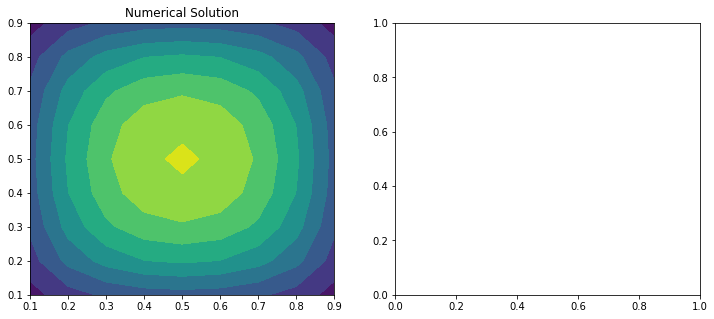

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.contourf(Xi, Yi, U)
ax1.title.set_text('Numerical Solution')
#ax2.contourf(Xi, Yi, U_exact)
#ax2.title.set_text('Exact Solution')